<a href="https://colab.research.google.com/github/Abde-Ali/Banking-Domain-Case-Study/blob/main/Credit_Risk_Prediction_Pipeline_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Untitled folder/credit_risk_dataset.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.svm import SVC

In [4]:
sc = StandardScaler()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
gn = GaussianNB()
lr = LogisticRegression()
kn = KNeighborsClassifier()

In [5]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['int','float']).columns.drop('loan_status')

In [8]:
x = df.drop(['loan_status'],axis = 1)
y = df['loan_status']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify = y)

In [10]:
num_pipeline = Pipeline(steps=[('Standard Scalar',sc),('Imputer',SimpleImputer(strategy='mean'))])
cat_pipeline = Pipeline(steps=[('OneHotEncoder',OneHotEncoder(drop='first')),('Imputer',SimpleImputer(strategy='most_frequent'))])
ct = ColumnTransformer([('Standardization',num_pipeline,num_col),("OneHotEncoder",cat_pipeline,cat_col)])

In [26]:
pipe = make_pipeline(ct,lr)
set_config(display='diagram')
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Standardization',
                                                  Pipeline(steps=[('Standard '
                                                                   'Scalar',
                                                                   StandardScaler()),
                                                                  ('Imputer',
                                                                   SimpleImputer())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('OneHotEncoder',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('Imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [16]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def get_metrics(real, pred):
    print("Accuracy Score :",np.around(accuracy_score(real, pred),2))
    print("Precision Score :",np.around(precision_score(real, pred),2))
    print("Recall Score :", np.around(recall_score(real, pred),2))
    print("F1 Score :", np.around(f1_score(real, pred),2))
    print("Confusion Matrix :")
    sns.heatmap(pd.crosstab(index=real, columns=pred, rownames=['Real'],colnames=['Predicted']), annot=True, fmt='.0f')
    plt.show()

Accuracy Score : 0.86
Precision Score : 0.76
Recall Score : 0.55
F1 Score : 0.64
Confusion Matrix :


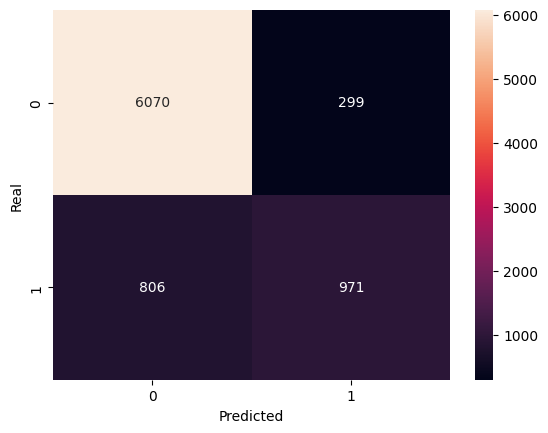

In [25]:
get_metrics(y_test, pipe.predict(x_test))

In [27]:
pipe1 = make_pipeline(ct,rfc)
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Standardization',
                                                  Pipeline(steps=[('Standard '
                                                                   'Scalar',
                                                                   StandardScaler()),
                                                                  ('Imputer',
                                                                   SimpleImputer())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('OneHotEncoder',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('Imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

Accuracy Score : 0.93
Precision Score : 0.97
Recall Score : 0.71
F1 Score : 0.82
Confusion Matrix :


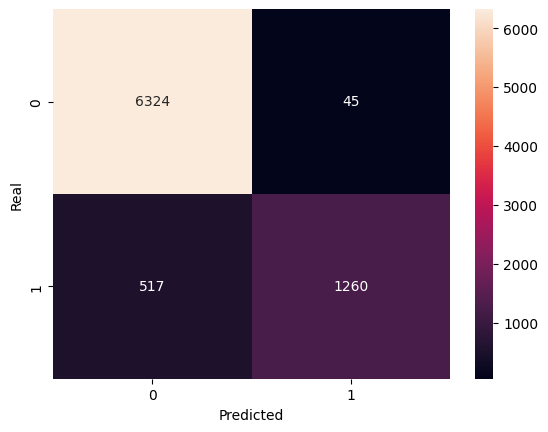

In [28]:
get_metrics(y_test, pipe1.predict(x_test))

Accuracy Score : 0.91
Precision Score : 0.93
Recall Score : 0.63
F1 Score : 0.75
Confusion Matrix :


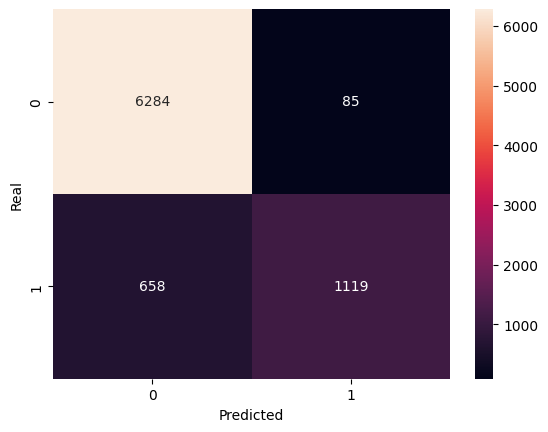

In [29]:
pipe2 = make_pipeline(ct,svc)
pipe2.fit(x_train,y_train)
get_metrics(y_test,pipe2.predict(x_test))

Accuracy Score : 0.89
Precision Score : 0.74
Recall Score : 0.76
F1 Score : 0.75
Confusion Matrix :


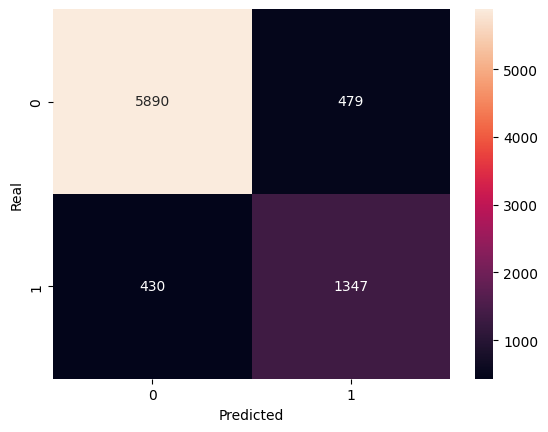

In [30]:
pipe3 = make_pipeline(ct,dt)
pipe3.fit(x_train,y_train)
get_metrics(y_test,pipe3.predict(x_test))

Accuracy Score : 0.83
Precision Score : 0.69
Recall Score : 0.44
F1 Score : 0.54
Confusion Matrix :


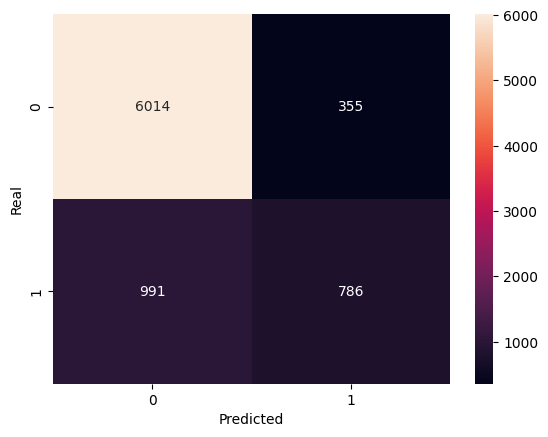

In [31]:
pipe4 = make_pipeline(ct,gn)
pipe4.fit(x_train,y_train)
get_metrics(y_test,pipe4.predict(x_test))

Accuracy Score : 0.88
Precision Score : 0.82
Recall Score : 0.59
F1 Score : 0.69
Confusion Matrix :


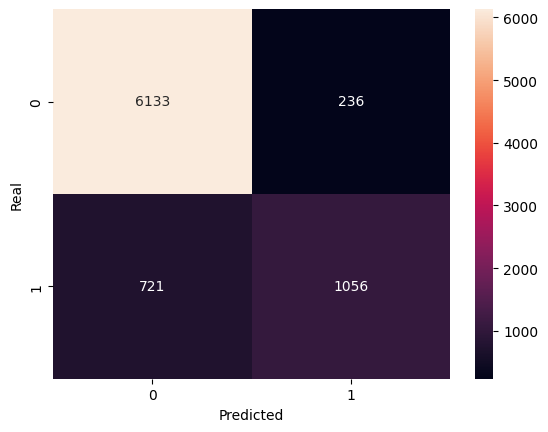

In [32]:
pipe5 = make_pipeline(ct,kn)
pipe5.fit(x_train,y_train)
get_metrics(y_test,pipe5.predict(x_test))